# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     889.4
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           1.02e-40
Time:                        18:25:25   Log-Likelihood:                -1.8867
No. Observations:                  50   AIC:                             11.77
Df Residuals:                      46   BIC:                             19.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8853      0.089     54.712      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.34586921  4.85648608  5.3251497   5.72280776  6.03089278  6.2443727
  6.3725776   6.43766684  6.47098831  6.50792805  6.58209648  6.71980622
  6.93574908  7.23058218  7.59082003  7.99105013  8.39810816  8.77652683
  9.09436303  9.32844596  9.46818409  9.51730528  9.49324429  9.42427835
  9.34488123  9.29005934  9.28960027  9.36317875  9.51712416  9.74338066
 10.02083069 10.31876457 10.60192596 10.83630446 10.99472334 11.06130464
 11.03407787 10.92530376 10.75945984 10.56921886 10.39008077 10.25454013
 10.1867474  10.19854105 10.28750255 10.43735373 10.62063121 10.80319861
 10.94985499 11.03011833]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.00861072 10.84621219 10.56382806 10.2090989   9.8447365   9.53316976
  9.32126     9.22882761  9.24379937  9.32516437]


## Plot comparison

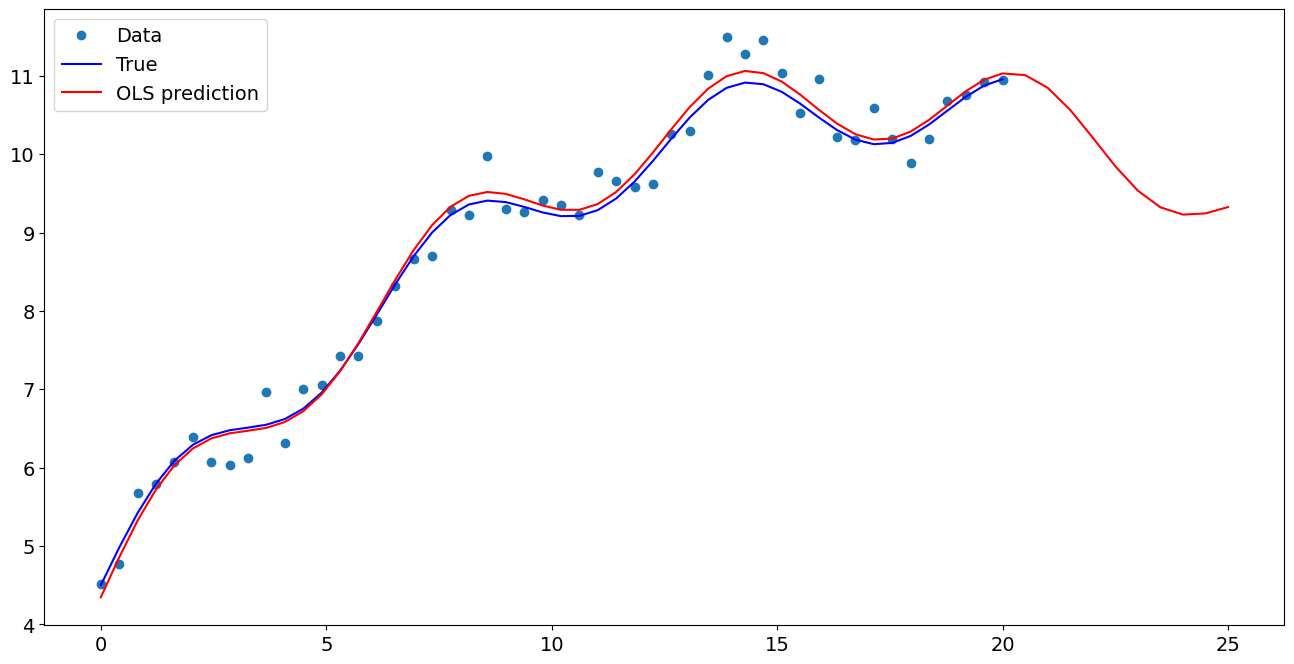

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.885294
x1                  0.525649
np.sin(x1)          0.533078
I((x1 - 5) ** 2)   -0.021577
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.008611
1    10.846212
2    10.563828
3    10.209099
4     9.844736
5     9.533170
6     9.321260
7     9.228828
8     9.243799
9     9.325164
dtype: float64